# LASSO regression to predict TCR clonality change using pre-treatmnet samples

In [1]:
setwd("~/Documents/PhD/Software/Scripts/OVCT/R_scripts/LASSO/OVCTk_TCR/")

In [3]:
install.packages("glmnet", repos = "http://cran.us.r-project.org")

also installing the dependencies ‘iterators’, ‘foreach’




The downloaded binary packages are in
	/var/folders/0x/_9tqxlf13mq9dnj3mvt0kr94vsllz0/T//RtmpSWpKpy/downloaded_packages


In [4]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13



# Load normalized enrichment scores data

In [5]:
dataH<-read.table('OVCTk_clin_expHallmarks_tcr2.txt',sep='\t',header=T,row.names='ID')
dataC<-read.table('OVCTk_clin_expCells_tcr2.txt',sep='\t',header=T,row.names='ID')

In [6]:
dataH

,HALLMARK_TNFA_SIGNALING_VIA_NFKB,HALLMARK_HYPOXIA,HALLMARK_CHOLESTEROL_HOMEOSTASIS,HALLMARK_MITOTIC_SPINDLE,HALLMARK_WNT_BETA_CATENIN_SIGNALING,HALLMARK_TGF_BETA_SIGNALING,HALLMARK_IL6_JAK_STAT3_SIGNALING,HALLMARK_DNA_REPAIR,HALLMARK_G2M_CHECKPOINT,HALLMARK_APOPTOSIS,⋯,HALLMARK_BILE_ACID_METABOLISM,HALLMARK_PEROXISOME,HALLMARK_ALLOGRAFT_REJECTION,HALLMARK_SPERMATOGENESIS,HALLMARK_KRAS_SIGNALING_UP,HALLMARK_KRAS_SIGNALING_DN,HALLMARK_PANCREAS_BETA_CELLS,StromalSignature,ImmuneSignature,clon_dif
3368,0.09243975,0.1857720,0.2551130,0.3050709,0.2184994,0.3190013,0.06305822,0.2830261,0.3660479,0.2927191,⋯,0.01772500,0.1568187,0.1009027,0.059224995,0.1685879,-0.1111823,-0.1459362,0.06787118,0.07424780,0.82121647
371,0.22117278,0.2147640,0.2849992,0.2937372,0.2119906,0.3234169,0.21946426,0.2795503,0.2719322,0.3685528,⋯,0.06864045,0.1592571,0.2407440,-0.013821828,0.2621269,-0.1219003,-0.2292431,0.26928211,0.34513783,0.30162732
9717,0.10006643,0.1929547,0.3212259,0.2787695,0.2524295,0.2752329,0.08043667,0.2867159,0.3446391,0.3017627,⋯,0.04616135,0.2008837,0.1138013,0.074824352,0.1263442,-0.1064091,-0.1370558,0.02408870,0.06988108,0.68871043
8674,0.10037598,0.1656335,0.2934478,0.2984587,0.2430485,0.2684412,0.06811437,0.2901997,0.3023870,0.3196652,⋯,0.07737381,0.2313680,0.1499126,0.075834784,0.1542899,-0.1029612,-0.2397341,0.15551323,0.13597718,-0.05367598
564,0.12746932,0.2080497,0.3078805,0.3723589,0.2508322,0.2733802,0.14162193,0.3313310,0.4209907,0.3472934,⋯,0.00473001,0.2134305,0.1862514,0.073141673,0.1788194,-0.1630182,-0.2747800,0.14355013,0.17842220,0.13568710
7765,0.10377900,0.2100650,0.3287102,0.3400930,0.2716443,0.3247757,0.14270194,0.3538589,0.4133252,0.3009407,⋯,0.03294449,0.2010939,0.1637472,0.039350088,0.1943320,-0.1608965,-0.2601731,0.18762124,0.16314987,1.13781465
6965,0.26950706,0.2674401,0.3029803,0.3161044,0.2098915,0.3632646,0.22420808,0.3001078,0.3317444,0.3948746,⋯,0.04703005,0.2278591,0.2895057,0.009016681,0.2758787,-0.1271848,-0.1766279,0.26590158,0.36404085,0.14493776
9347,0.16269765,0.1989115,0.3497781,0.2696973,0.2008035,0.2892402,0.13615196,0.2733981,0.3465497,0.3051885,⋯,0.05493862,0.1801269,0.1528050,0.096140041,0.1516262,-0.1451380,-0.1917365,0.12209204,0.09036973,0.57524735


In [8]:
d<-merge(dataH,dataC)

# Select explanatory and response variables

In [9]:
x<-as.matrix(subset(d, select = -c(clon_dif)))
y<-as.matrix(d$clon_dif)

# Check reponse distribution

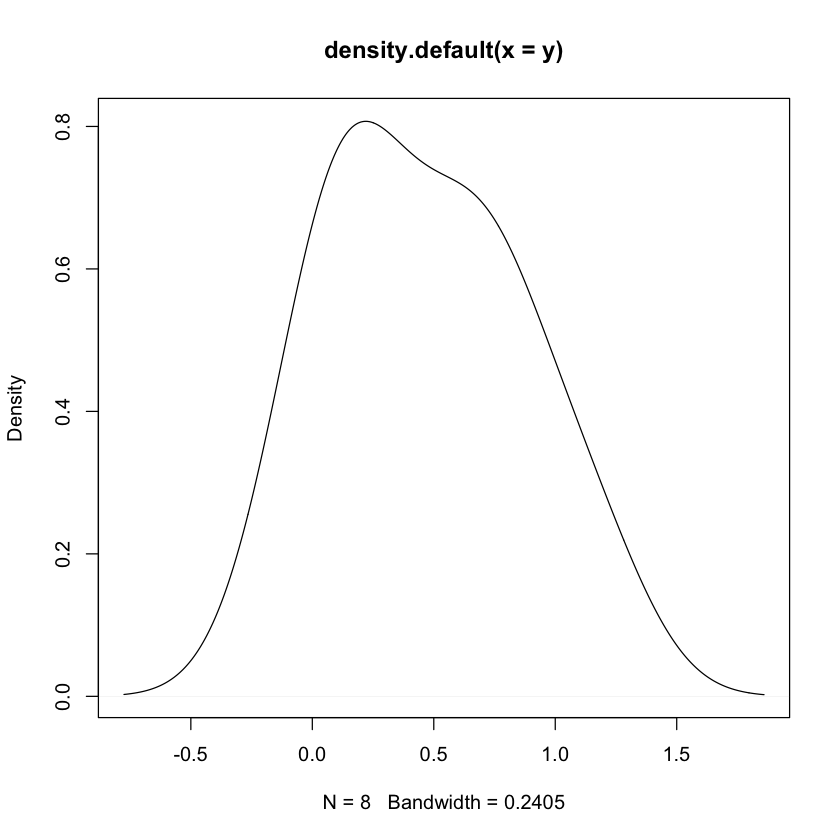

In [39]:
plot(density(y)) # the data is log2(t1/t0)

In [40]:
# Check normality of data
shapiro.test(y)


	Shapiro-Wilk normality test

data:  y
W = 0.9573, p-value = 0.784


# Linear lasso gaussian regression

In [11]:
fit<-glmnet(x,y,family='gaussian',alpha=1,standardize=T)

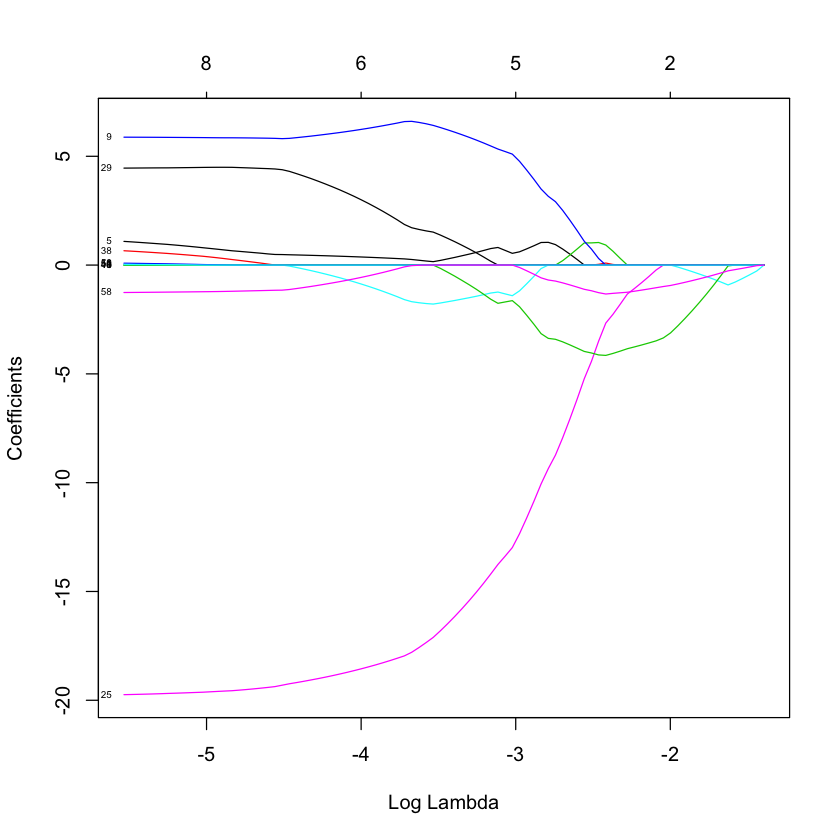

In [12]:
plot(fit,xvar='lambda',label=TRUE)

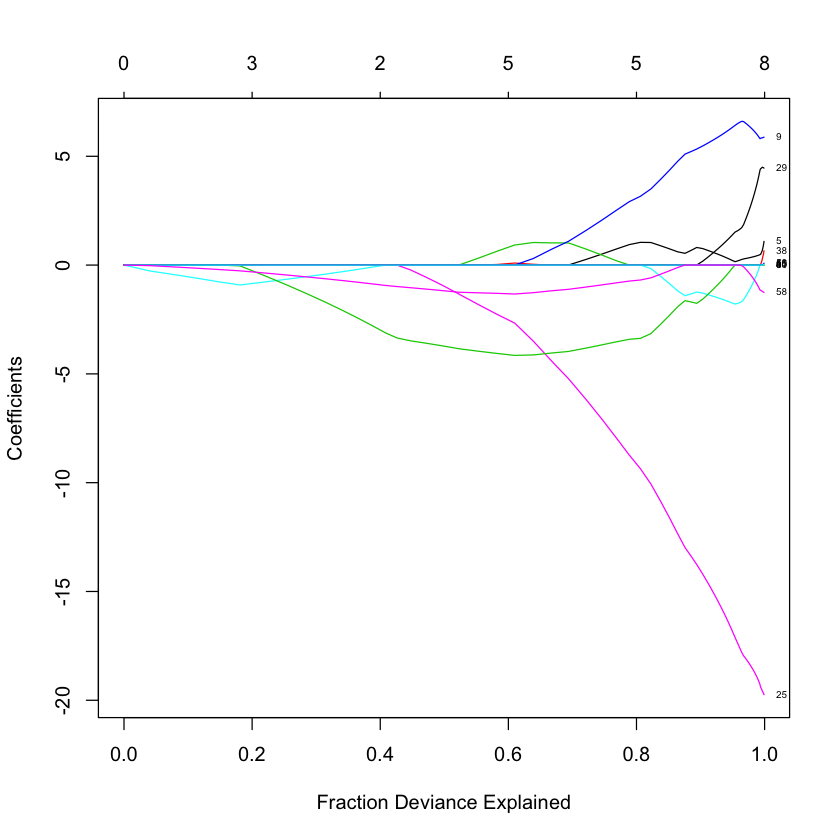

In [13]:
plot(fit,xvar='dev',label=TRUE)

In [15]:
colnames(x)[25]

[1] "HALLMARK_PI3K_AKT_MTOR_SIGNALING"

In [16]:
colnames(x)[9]

[1] "HALLMARK_G2M_CHECKPOINT"

In [41]:
colnames(x)[29]

[1] "HALLMARK_MYC_TARGETS_V2"

In [42]:
colnames(x)[5]

[1] "HALLMARK_WNT_BETA_CATENIN_SIGNALING"

In [43]:
colnames(x)[38]

[1] "HALLMARK_UV_RESPONSE_UP"

In [44]:
colnames(x)[58]

[1] "cytotoxic"

In [ ]:
# Selecting lambda below is not trivial, if I use lambda = 0.05 I get the following

In [56]:
coef(fit,s=0.05, exact = FALSE)

72 x 1 sparse Matrix of class "dgCMatrix"
                                                      1
(Intercept)                                  2.87994181
HALLMARK_TNFA_SIGNALING_VIA_NFKB             .         
HALLMARK_HYPOXIA                             .         
HALLMARK_CHOLESTEROL_HOMEOSTASIS             .         
HALLMARK_MITOTIC_SPINDLE                     .         
HALLMARK_WNT_BETA_CATENIN_SIGNALING          0.57899370
HALLMARK_TGF_BETA_SIGNALING                  .         
HALLMARK_IL6_JAK_STAT3_SIGNALING             .         
HALLMARK_DNA_REPAIR                          .         
HALLMARK_G2M_CHECKPOINT                      4.91514536
HALLMARK_APOPTOSIS                          -1.28295138
HALLMARK_NOTCH_SIGNALING                     .         
HALLMARK_ADIPOGENESIS                        .         
HALLMARK_ESTROGEN_RESPONSE_EARLY             .         
HALLMARK_ESTROGEN_RESPONSE_LATE              .         
HALLMARK_ANDROGEN_RESPONSE                   .         
HALLMA

In [59]:
?cv.glmnet

In [62]:
cvfit=cv.glmnet(x,y,family="gaussian",type.measure="mse",alpha=1,nfold=10) # type.measure can be mae

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”

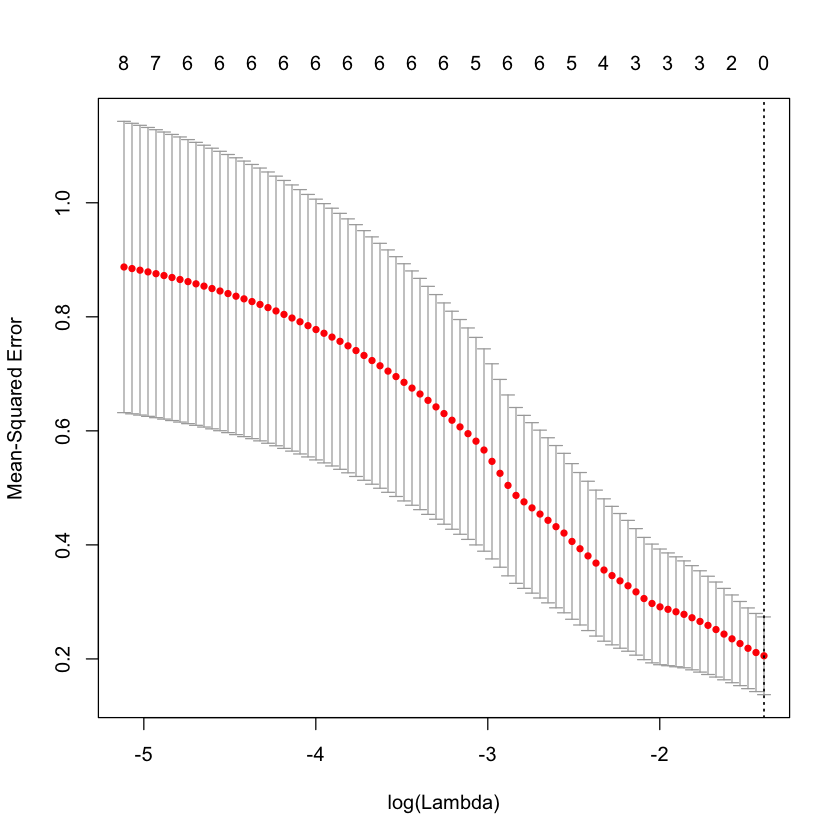

In [63]:
plot(cvfit)

In [64]:
cvfit$lambda.min

[1] 0.2480904

In [65]:
coef(cvfit, s = "lambda.min") # no variable is selected using lambda.min

72 x 1 sparse Matrix of class "dgCMatrix"
                                                   1
(Intercept)                                0.4689456
HALLMARK_TNFA_SIGNALING_VIA_NFKB           .        
HALLMARK_HYPOXIA                           .        
HALLMARK_CHOLESTEROL_HOMEOSTASIS           .        
HALLMARK_MITOTIC_SPINDLE                   .        
HALLMARK_WNT_BETA_CATENIN_SIGNALING        .        
HALLMARK_TGF_BETA_SIGNALING                .        
HALLMARK_IL6_JAK_STAT3_SIGNALING           .        
HALLMARK_DNA_REPAIR                        .        
HALLMARK_G2M_CHECKPOINT                    .        
HALLMARK_APOPTOSIS                         .        
HALLMARK_NOTCH_SIGNALING                   .        
HALLMARK_ADIPOGENESIS                      .        
HALLMARK_ESTROGEN_RESPONSE_EARLY           .        
HALLMARK_ESTROGEN_RESPONSE_LATE            .        
HALLMARK_ANDROGEN_RESPONSE                 .        
HALLMARK_MYOGENESIS                        .        
HALL

# 100 crossvalidation cycles to select lambda min

In [18]:
# initialize vector for final data.frame with Mean Standard Errors
MSEs<-NULL

In [19]:
for (i in 1:100){
  cv<-cv.glmnet(x,y,family="gaussian",type.measure="mse",alpha=1,nfold=10,grouped=F) # type.measure can be mae too
  MSEs<-cbind(MSEs, cv$cvm)
}

In [20]:
# take the average of the mean error curves
rownames(MSEs) <- cv$lambda
lambda.min <- as.numeric(names(which.min(rowMeans(MSEs))))

In [21]:
lambda.min # same lambda as above, so no variable is selected

[1] 0.2480904

In [22]:
cvfit=cv.glmnet(x,y,family="gaussian",type.measure="mse",alpha=1,nfold=10) # type.measure can be mae too

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”

In [23]:
cvfit$lambda.min

[1] 0.2480904

In [24]:
coef(cvfit, s = lambda.min)

72 x 1 sparse Matrix of class "dgCMatrix"
                                                   1
(Intercept)                                0.4689456
HALLMARK_TNFA_SIGNALING_VIA_NFKB           .        
HALLMARK_HYPOXIA                           .        
HALLMARK_CHOLESTEROL_HOMEOSTASIS           .        
HALLMARK_MITOTIC_SPINDLE                   .        
HALLMARK_WNT_BETA_CATENIN_SIGNALING        .        
HALLMARK_TGF_BETA_SIGNALING                .        
HALLMARK_IL6_JAK_STAT3_SIGNALING           .        
HALLMARK_DNA_REPAIR                        .        
HALLMARK_G2M_CHECKPOINT                    .        
HALLMARK_APOPTOSIS                         .        
HALLMARK_NOTCH_SIGNALING                   .        
HALLMARK_ADIPOGENESIS                      .        
HALLMARK_ESTROGEN_RESPONSE_EARLY           .        
HALLMARK_ESTROGEN_RESPONSE_LATE            .        
HALLMARK_ANDROGEN_RESPONSE                 .        
HALLMARK_MYOGENESIS                        .        
HALL

# So one option is to select the variables based on plots 12 and 13, correct?